# Analyse en composantes principales (PCA)

L'objectif de ce notebook est d'étudier l'une des méthodes de Machine Learning en **apprentissage non supervisé** : **l'analyse en composantes principales - ACP - ou PCA en anglais)**. 

Afin de bien **comprendre les notions sous-jacentes à cette méthode**, nous avez regardé la vidéo suivante : https://www.youtube.com/watch?v=8qw0bNfK4H0

Après avoir défini les concepts de base sur lesquels repose la PCA,nous allons appliquer cette méthode à un jeu de données réelles puis interpréter les résultats en sortie.

## 1. Définitions

(Durée moyenne : 30 min)



1. Définir une méthode d'analyse factorielle

L'analyse factorielle est un terme qui désigne aujourd'hui plusieurs méthodes d'analyses de grands tableaux rectangulaires de données, visant à déterminer et à hiérarchiser des facteurs corrélés aux données placées en colonnes.

Au sens anglo-saxon du terme, l'analyse factorielle (factor analysis) désigne une méthode de la famille de la statistique multivariée, utilisée pour décrire un ensemble de variables observées, au moyen de variables latentes (non observées). Pour réduire le nombre de variables, la méthode calcule ces variables latentes comme combinaisons linéaires des variables observées.

Les méthodes factorielles bénéficient d’une propriété remarquable connue sous le nom de dualité. Les coordonnées des points du nuage Ni (dans Rj) obtenues par projection sur ses axes principaux sont liées aux coordonnées de Nj (dans Ri) sur ses axes principaux. Les deux représentations (de Ni et de Nj) doivent être étudiées ensemble (voire être représentées ensemble comme c’est le cas en AFC et ACM) et décrivent la même structure du tableau des données, l’une à partir des lignes et l’autre à partir des colonnes.

2. Définir une PCA. Sur quel type de données peut-elle être appliquée? Citer des exemples d'utilisation de la PCA

L'analyse en composantes principales (ACP ou PCA en anglais pour principal component analysis), ou selon le domaine d'application la transformation de Karhunen–Loève (KLT)1, est une méthode de la famille de l'analyse des données et plus généralement de la statistique multivariée, qui consiste à transformer des variables liées entre elles (dites « corrélées » en statistique) en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées « composantes principales », ou axes principaux. Elle permet au praticien de réduire le nombre de variables et de rendre l'information moins redondante.

Il s'agit d'une approche à la fois géométrique2 (les variables étant représentées dans un nouvel espace, selon des directions d'inertie maximale) et statistique (la recherche portant sur des axes indépendants expliquant au mieux la variabilité — la variance — des données). Lorsqu'on veut compresser un ensemble de N variables aléatoires, les n premiers axes de l'analyse en composantes principales sont un meilleur choix, du point de vue de l'inertie ou de la variance.

Applications :
- Compression
- Analyse de séries dynamiques d'images
- Analyse d'images multi spectrales
- Evolution de la topographie

Elle ne peut être appliquée que sur des données quantitatives.

3. Quelle est la matrice en entrée de l'ACP? Quelle(s) transformation(s) peuvent être appliquées à cette matrice? Justifier

On applique généralement une ACP sur un ensemble de N variables aléatoires X1, …, XN connues à partir d'un échantillon de K réalisations conjointes de ces variables.

Cet échantillon de ces N variables aléatoires peut être structuré dans une matrice M, à K lignes et N colonnes.

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/28ed0a6454c07d2a7016e9026e0bb3c044174403)

Chaque variable aléatoire Xn, dont X1, n, …, XK, n sont des réalisations indépendantes, a une moyenne Xn et un écart type σXn.

La matrice peut être réduite : 

La matrice M est généralement centrée sur le centre de gravité :

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/ffe7e23e6b147718147c76c842810a101fb9579a)

Elle peut être aussi réduite :

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ab3d1c0a519a344e66128fd1fa9efcbbdc596de)

On va travailler sur des données standardisées et normalisées.

4. Quelle décomposition (ou factorisation) matricielle est utilisée pour l'ACP? Définir l'inertie. Que vaut l'inertie totale lorsque les variables sont centrées et réduites (on parle d'ACP normée)? 

Il faut décomposer la matrice d'entrée centrée réduite en valeur singulière. 

Inertie : variance des variables. 

Dans la PCA, on cherche à maximiser la dispersion du nuage, maximiser la variance en conservant les axes les plus pertinents.

5. Définir une composante principale. Quelles sont ses propriétés?

On transforme des variables liées entre elles (dites « corrélées » en statistique) en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées « composantes principales », ou axes principaux. Elle permet au praticien de réduire le nombre de variables et de rendre l'information moins redondante.

L'axe principal reflète le maximum d'information concernant le nuage de points. La variance de la composante principale est son inertie.

6. Lister des outils d'aide à l'interprétation des résultats

Outils d'aide à l'interprétation des résultats:   
- Qualité de la projection mesuré avec le pourcentage d'inertie expliqué par chaque axe ou par un plan,
- Diagramme en barre explique pour chaque dimension
- Cercle de corrélation
- 

## 2. PCA sur un jeu de données réelles

(Durée moyenne : 2 heures)

L’objectif de cette partie est de mettre en pratique à l'aide de Python la méthode ACP sur un jeu de données réel. Nous allons effectuer pas à pas les différentes étapes de calcul en portant une attention particulière à l'interprétation des résultats pour résumer les relations entre les variables et les individus.

Nous allons nous intéresser au jeu de données sur les performances des athlètes de décathlon à 2 compétitions (JO et Décastar en 2004).Ils participent à 10 épreuves (100m, longueur, poids, hauteur, 400m, 110haies,disque, perche, javelot, 1500m).
Pour ces deux compétitions, on dispose, pour chaque athlète présent, de **ses performances à chacune des 10 épreuves** (les épreuves de vitesse sont mesurées en seconde, les autres en mètres), de son **nombre de points** (à chaque épreuve, un athlète gagne des points en fonction de sa performance) et de son **classement final**. 

L'objectif de l'ACP sur ce jeu de données est de répondre à différentes questions :
- Etude des individus (i.e. des athlètes) :  Y a-t-il des similarités entre les individus pour toutes les variables ? Peut-on établir des profils d'athlètes ? Peut-on opposer un groupe d'individus à un autre ?

- Etude des variables (i.e. des performances) : on étudie les liaisons linéaires entre les variables. Les objectifs sont de résumer la matrice des corrélations et de chercher des variables synthétiques: peut-on résumer les performances des athlètes par un petit nombre de variables ?

- Lien entre les deux études : peut-on caractériser des groupes d'individus par des variables ?

1. Charger le fichier de données et afficher sa dimension

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('Donnees_decathlon.txt', sep="\t")
data

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement,NbPoints,Competition
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,OlympicG
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,OlympicG
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.60,55.54,278.11,3,8725,OlympicG
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.40,58.46,265.42,4,8414,OlympicG
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.90,55.39,278.05,5,8343,OlympicG
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,6,8287,OlympicG
Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.80,57.76,264.35,7,8237,OlympicG
Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,OlympicG
Bernard,10.69,7.48,14.80,2.12,49.13,14.17,44.75,4.40,55.27,276.31,9,8225,OlympicG
Schwarzl,10.98,7.49,14.01,1.94,49.76,14.25,42.43,5.10,56.32,273.56,10,8102,OlympicG


In [4]:
data.shape

(41, 13)

2. Etude exploratoire des variables

Afficher le type des variables. Afficher les statistiques descriptives de chaque variable. Analyser les boxplot des variables quantitatives. Construire la matrice des corrélations entre les variables quantitatives avec la librairie `seaborn`. Interpréter les résultats

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, Sebrle to BOURGUIGNON
Data columns (total 13 columns):
100m           41 non-null float64
Long           41 non-null float64
Poids          41 non-null float64
Haut           41 non-null float64
400m           41 non-null float64
110m.haies     41 non-null float64
Disque         41 non-null float64
Perche         41 non-null float64
Javelot        41 non-null float64
1500m          41 non-null float64
Classement     41 non-null int64
NbPoints       41 non-null int64
Competition    41 non-null object
dtypes: float64(10), int64(2), object(1)
memory usage: 4.5+ KB


In [10]:
data.describe()

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement,NbPoints
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


In [12]:
data_quanti = data.drop(["Classement", "Competition"], axis = 1)
data_quanti

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,NbPoints
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,8893
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,8820
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.60,55.54,278.11,8725
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.40,58.46,265.42,8414
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.90,55.39,278.05,8343
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,8287
Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.80,57.76,264.35,8237
Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8235
Bernard,10.69,7.48,14.80,2.12,49.13,14.17,44.75,4.40,55.27,276.31,8225
Schwarzl,10.98,7.49,14.01,1.94,49.76,14.25,42.43,5.10,56.32,273.56,8102


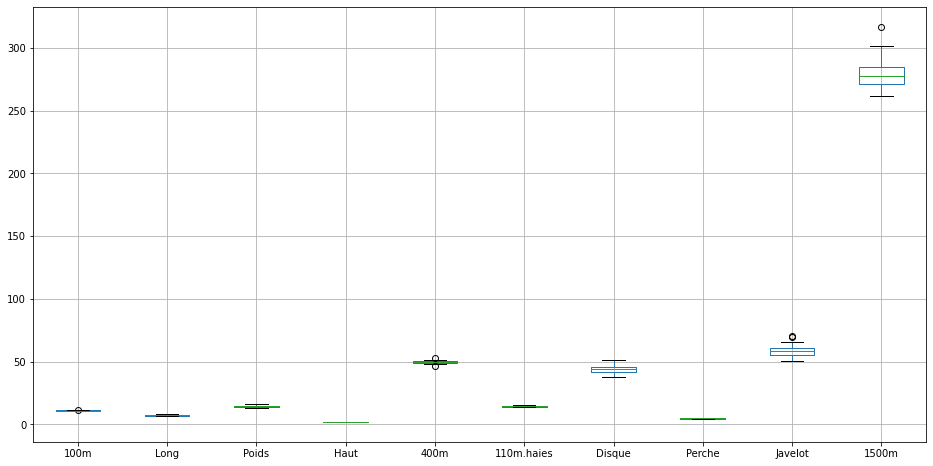

In [50]:
data.boxplot(column = ["100m", "Long", "Poids", "Haut", "400m", "110m.haies", "Disque", "Perche", "Javelot", "1500m"], figsize=(16,8))


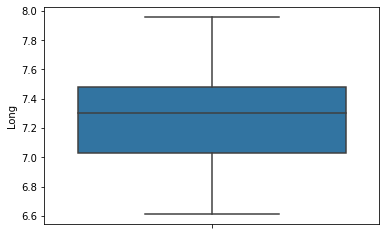

In [19]:
sns.boxplot(x=data_quanti["Long"], orient = "v")

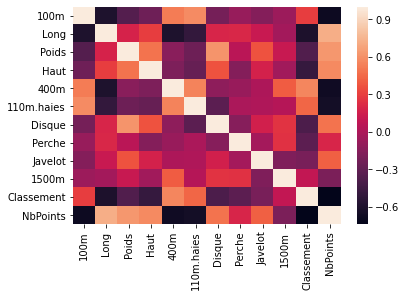

In [20]:
correlation = data.corr()
sns.heatmap(correlation)

In [21]:
correlation

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement,NbPoints
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746,-0.060546,0.296704,-0.684272
Long,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759,-0.033686,-0.604055,0.725135
Poids,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956,0.115803,-0.369970,0.627389
Haut,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880,-0.044903,-0.492769,0.576703
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232,0.408106,0.562119,-0.666940
110m.haies,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743,0.037540,0.439102,-0.644460
Disque,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890,0.258175,-0.389125,0.484183
Perche,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001,0.247448,-0.320380,0.197436
Javelot,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000,-0.180393,-0.208095,0.422393
1500m,-0.060546,-0.033686,0.115803,-0.044903,0.408106,0.037540,0.258175,0.247448,-0.180393,1.000000,0.089898,-0.194349


In [22]:
data_jo = data[data["Competition"] == "OlympicG"]
data_jo

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement,NbPoints,Competition
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,OlympicG
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,OlympicG
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,OlympicG
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,OlympicG
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,OlympicG
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54,6,8287,OlympicG
Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.8,57.76,264.35,7,8237,OlympicG
Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.4,61.33,276.33,8,8235,OlympicG
Bernard,10.69,7.48,14.80,2.12,49.13,14.17,44.75,4.4,55.27,276.31,9,8225,OlympicG
Schwarzl,10.98,7.49,14.01,1.94,49.76,14.25,42.43,5.1,56.32,273.56,10,8102,OlympicG


In [23]:
correlation_jo = data_jo.corr()
correlation_jo

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement,NbPoints
100m,1.000000,-0.704970,-0.369696,-0.309284,0.634785,0.542558,-0.233317,-0.260452,-0.011690,0.058434,0.674898,-0.713837
Long,-0.704970,1.000000,0.195451,0.345662,-0.671111,-0.538163,0.249909,0.285079,0.093792,-0.147426,-0.728948,0.767933
Poids,-0.369696,0.195451,1.000000,0.612582,-0.199300,-0.245070,0.665774,0.023692,0.383343,0.129544,-0.565448,0.620881
Haut,-0.309284,0.345662,0.612582,1.000000,-0.169159,-0.325958,0.516963,-0.042382,0.204481,-0.003496,-0.623205,0.627001
400m,0.634785,-0.671111,-0.199300,-0.169159,1.000000,0.519880,-0.144186,-0.115428,-0.054654,0.551224,0.666748,-0.704489
110m.haies,0.542558,-0.538163,-0.245070,-0.325958,0.519880,1.000000,-0.216872,-0.150975,-0.079820,0.179045,0.644405,-0.653155
Disque,-0.233317,0.249909,0.665774,0.516963,-0.144186,-0.216872,1.000000,-0.184211,0.254854,0.220172,-0.456114,0.505312
Perche,-0.260452,0.285079,0.023692,-0.042382,-0.115428,-0.150975,-0.184211,1.000000,-0.066105,0.179471,-0.279279,0.283477
Javelot,-0.011690,0.093792,0.383343,0.204481,-0.054654,-0.079820,0.254854,-0.066105,1.000000,-0.251506,-0.336920,0.421440
1500m,0.058434,-0.147426,0.129544,-0.003496,0.551224,0.179045,0.220172,0.179471,-0.251506,1.000000,0.356272,-0.288838


Ce que l'on peut observer :
- il faut atteindre le plus grand nombre de point pour avoir le meilleur classement
- les épreuves qui ont le plus d'importance sont le 100m, la longueur et le 400m
- les épreuves qui ont le moins d'importance sont le 1500m, la perche et le javelot

3. Standardiser (centrer et réduire) les données des 10 épreuves à l'aide de `sklearn.preprocessing.StandardScaler`. On appelera **Z la table en sortie**.
   Contrôler après cette opération la moyenne et la variance de chaque variable.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_epreuve = data.drop(["Classement","NbPoints","Competition"], axis = 1)
Z = scaler.fit_transform(data_epreuve)


In [27]:
Z

array([[-5.69866389e-01,  1.85588557e+00,  2.31229234e+00,
         1.62954997e+00, -1.10273344e+00, -1.19281907e+00,
         1.31710642e+00,  8.65152189e-01,  2.55965940e+00,
         8.54398045e-02],
       [-2.14803015e+00,  2.23986190e+00,  9.24617418e-01,
         9.46638058e-01, -3.74214339e-01, -1.02114524e+00,
         1.73372348e+00,  5.00971083e-01,  2.38976236e+00,
         2.58032863e-01],
       [-1.91707935e+00,  1.75989149e+00,  1.78423905e+00,
         1.28809401e+00, -2.46322093e+00, -1.36449290e+00,
         2.19529921e+00, -5.91572236e-01, -5.82387230e-01,
        -7.93475382e-02],
       [-4.15899194e-01,  6.71958569e-01,  1.53863287e+00,
         1.97100593e+00, -5.67315788e-01, -9.83984137e-02,
         1.20321111e+00, -1.31993445e+00,  3.00811394e-02,
        -1.17995353e+00],
       [-1.45517777e+00,  1.53590530e+00,  3.59423680e-03,
        -7.77298112e-02, -1.44504965e+00, -1.27865598e+00,
        -1.78518837e-01,  5.00971083e-01, -6.13849646e-01,
        -8.

In [112]:
Z_df = pd.DataFrame(data=Z)
Z_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,6.590934e-15,-2.274603e-15,-1.635548e-15,-2.003817e-16,-7.305809e-15,-2.783681e-15,-7.311225e-16,-8.854706e-16,2.131087e-15,-2.924490e-15
std,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-2.148030e+00,-2.079872e+00,-2.206861e+00,-1.443554e+00,-2.463221e+00,-1.364493e+00,-1.919918e+00,-2.048297e+00,-1.679377e+00,-1.467898e+00
25%,-5.698664e-01,-7.359546e-01,-7.332243e-01,-6.468231e-01,-6.024251e-01,-8.494714e-01,-7.270147e-01,-9.557533e-01,-6.390196e-01,-6.942645e-01
50%,-6.947300e-02,1.279921e-01,1.141170e-01,-3.053671e-01,-1.898902e-01,-2.700722e-01,2.529382e-02,1.367900e-01,9.106195e-03,-8.455135e-02
75%,5.463958e-01,7.039566e-01,6.053294e-01,7.190008e-01,6.000702e-01,8.028892e-01,5.228365e-01,5.738073e-01,5.397723e-01,5.268964e-01
max,2.470986e+00,2.239862e+00,2.312292e+00,1.971006e+00,3.145498e+00,2.283576e+00,2.195299e+00,2.321877e+00,2.559659e+00,3.293589e+00


4. Afficher la DocString de `sklearn.decomposition.PCA` . Commenter la sortie.
   
   Réaliser la PCA de la matrice Z générée à l'étape précédente. Afficher le nombre par défaut de composantes principales.

In [30]:
from sklearn.decomposition import PCA

help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Param

In [61]:
pca = PCA()
Z_pca = pca.fit(Z)

Le nombre de composantes principales est min(n_features;n_samples) = 10.

In [62]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.32719055 0.1737131  0.14049167 0.10568504 0.06847735 0.05992687
 0.04512353 0.03968766 0.02148149 0.01822275]
1.0


5. Afficher les valeurs propres associées à chaque composante (en nombre, pourcentage, pourcentage cumulé). Tracer le **scree Plot** des valeurs propres cumulées et non cumulées. Interpréter les résultats et sélectionner le nombre de composantes principales à retenir pour cette analyse. 

   **Bonus** : Diagonaliser la matrice de Variance-Covariance de Z et comparer les valeurs propres avec ceux en sortie de `PCA `

<Figure size 1440x720 with 0 Axes>

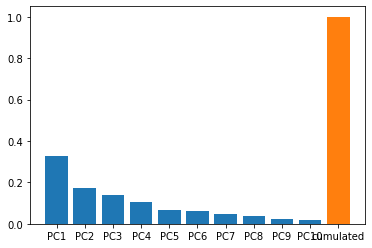

<Figure size 1440x720 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt

plt.bar(["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"], pca.explained_variance_ratio_)
plt.bar(["cumulated"], pca.explained_variance_ratio_.sum())


6. Refaire la PCA en fixant le nombre de composantes à celui retenu à l'étape précédente. Créer un DataFrame contenant les composantes principales.


In [113]:
pca_2 = PCA(n_components = 4)

In [114]:
pca_2.fit(Z)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [115]:
Z_pca_2 = pca_2.transform(Z)

In [116]:
Z_pca_2

array([[ 4.03844850e+00,  1.36582606e+00, -2.89956504e-01,
         1.94113411e+00],
       [ 3.91936516e+00,  8.36961363e-01,  2.31175320e-01,
         1.49397212e+00],
       [ 4.61998728e+00,  3.99952289e-02, -4.15857980e-02,
        -1.31352566e+00],
       [ 2.23346057e+00,  1.04176620e+00, -1.86436202e+00,
        -7.43213528e-01],
       [ 2.16839645e+00, -1.80320025e+00,  8.51017329e-01,
        -2.84599581e-01],
       [ 9.25132183e-01,  1.16865180e+00, -1.47748029e+00,
         8.07594720e-01],
       [ 8.89037852e-01, -6.18425216e-01, -8.98295348e-01,
        -1.34785077e-01],
       [ 2.95305667e-01, -1.54561667e+00,  1.35526013e+00,
         2.19972249e+00],
       [ 1.90633437e+00, -8.58042918e-02, -7.57185971e-01,
        -1.45097918e+00],
       [ 8.10786594e-02, -1.35345710e+00,  8.22486622e-01,
         3.99091434e-01],
       [ 5.39677028e-01,  7.70750990e-01,  1.34761978e+00,
        -5.52156922e-01],
       [ 1.14430985e-01, -3.98506081e-02,  7.40403981e-01,
      

In [117]:
df_pca = pd.DataFrame(data=Z_pca_2, index = data.index, columns = ["PC1","PC2","PC3","PC4"])

In [118]:
df_pca

,PC1,PC2,PC3,PC4
Sebrle,4.038449,1.365826,-0.289957,1.941134
Clay,3.919365,0.836961,0.231175,1.493972
Karpov,4.619987,0.039995,-0.041586,-1.313526
Macey,2.233461,1.041766,-1.864362,-0.743214
Warners,2.168396,-1.803200,0.851017,-0.284600
Zsivoczky,0.925132,1.168652,-1.477480,0.807595
Hernu,0.889038,-0.618425,-0.898295,-0.134785
Nool,0.295306,-1.545617,1.355260,2.199722
Bernard,1.906334,-0.085804,-0.757186,-1.450979
Schwarzl,0.081079,-1.353457,0.822487,0.399091


7. Représenter graphiquement le nuage des individus dans le plan factoriel des deux premières composantes principales. Afficher les noms des athlètes. Que pouvez vous dire de
    - Bourguignon et Karpov ?
    - Barras et Qi ?
    - Casarsa ?
    - Serble et Clay ?

In [119]:
# df_pca = df_pca.reset_index()

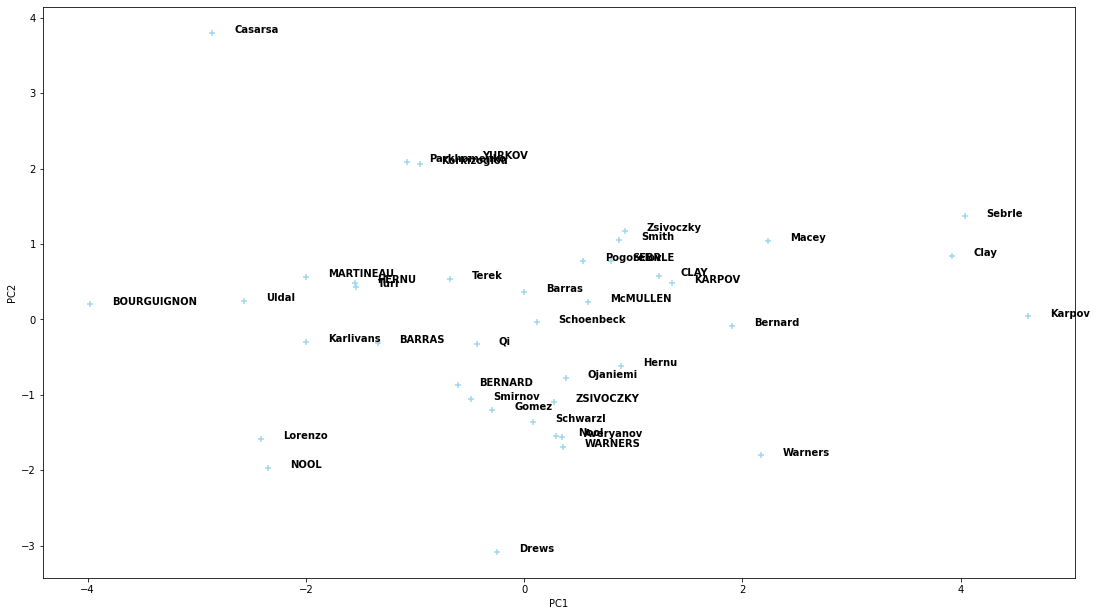

In [136]:
p1 = sns.regplot(data=df_pca, x="PC1", y="PC2", fit_reg=False, marker="+", color="skyblue")
for line in range(0,df_pca.shape[0]):
     p1.text(df_pca.PC1[line]+0.2, df_pca.PC2[line], df_pca.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
p1.figure.set_size_inches(18.5, 10.5)        

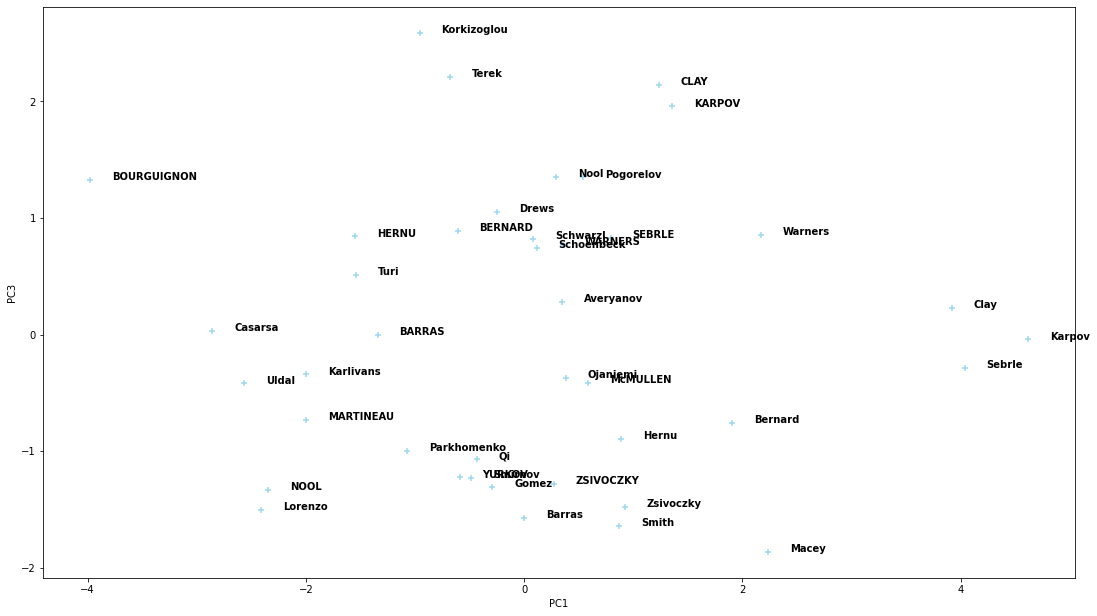

In [137]:
p2 = sns.regplot(data=df_pca, x="PC1", y="PC3", fit_reg=False, marker="+", color="skyblue")
for line in range(0,df_pca.shape[0]):
     p2.text(df_pca.PC1[line]+0.2, df_pca.PC3[line], df_pca.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
p2.figure.set_size_inches(18.5, 10.5)      

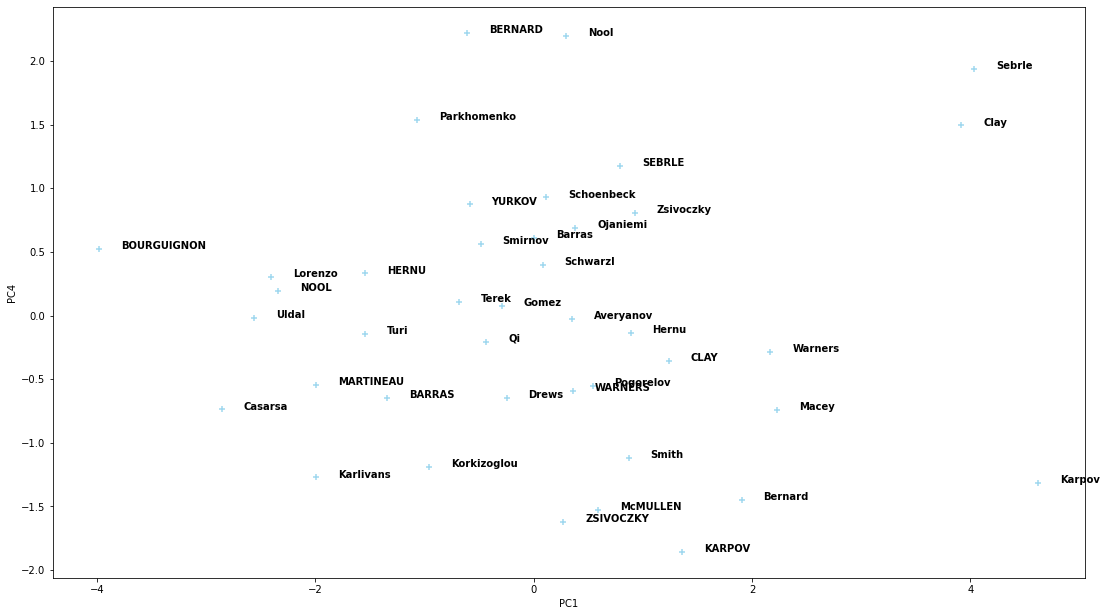

In [138]:
p4 = sns.regplot(data=df_pca, x="PC1", y="PC4", fit_reg=False, marker="+", color="skyblue")
for line in range(0,df_pca.shape[0]):
     p4.text(df_pca.PC1[line]+0.2, df_pca.PC4[line], df_pca.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
p4.figure.set_size_inches(18.5, 10.5)      

8.  Calculer la contribution des individus (athlètes) à l'inertie totale. Pour cela, calculer la somme des carrés des distances à l’origine des individus donnée par : 

Pour un individu i, $d_i^2 = \sum_{j=1}^{10}z_{ij}^2$           

$z_{ij}$ : élément i,j de la matrice Z    

Afficher les résultats pour chaque individu i dans un DataFrame. Interpréter les résultats

In [139]:
Z_df = pd.DataFrame(data=Z, index = data_epreuve.index, columns = data_epreuve.columns)

In [154]:
Z_df

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m
Sebrle,-0.569866,1.855886e+00,2.312292,1.629550,-1.102733,-1.192819,1.317106,0.865152,2.559659,0.085440
Clay,-2.148030,2.239862e+00,0.924617,0.946638,-0.374214,-1.021145,1.733723,0.500971,2.389762,0.258033
Karpov,-1.917079,1.759891e+00,1.784239,1.288094,-2.463221,-1.364493,2.195299,-0.591572,-0.582387,-0.079348
Macey,-0.415899,6.719586e-01,1.538633,1.971006,-0.567316,-0.098398,1.203211,-1.319934,0.030081,-1.179954
Warners,-1.455178,1.535905e+00,0.003594,-0.077730,-1.445050,-1.278656,-0.178519,0.500971,-0.613850,-0.084551
Zsivoczky,-0.338916,-3.839763e-01,1.022860,1.629550,-0.189890,0.738511,0.387960,-0.227391,1.076731,-0.822625
Hernu,-0.107965,-2.239862e-01,0.212359,0.605182,-0.777972,-0.763634,0.118208,0.136790,-0.116743,-1.272755
Nool,-0.762325,8.639467e-01,-0.266573,-1.102098,-0.707753,0.416623,-0.682056,2.321877,0.632062,-0.233727
Bernard,-1.185735,7.039566e-01,0.396564,1.629550,-0.426878,-0.935308,0.127200,-1.319934,-0.639020,-0.235462
Schwarzl,-0.069473,7.359546e-01,-0.573580,-0.419186,0.126094,-0.763634,-0.568161,1.229333,-0.418783,-0.473970


In [140]:
Z_df_square = Z_df**2

In [141]:
Z_df_square["sum"] = Z_df_square.sum(axis=1)

In [142]:
Z_df_square

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,sum
Sebrle,0.324748,3.444311e+00,5.346696,2.655433,1.216021,1.422817,1.734769,0.748488,6.551856,0.007300,23.452440
Clay,4.614034,5.016981e+00,0.854917,0.896124,0.140036,1.042738,3.005797,0.250972,5.710964,0.066581,21.599144
Karpov,3.675193,3.097218e+00,3.183509,1.659186,6.067457,1.861841,4.819339,0.349958,0.339175,0.006296,25.059172
Macey,0.172972,4.515283e-01,2.367391,3.884864,0.321847,0.009682,1.447717,1.742227,0.000905,1.392290,11.791425
Warners,2.117542,2.359005e+00,0.000013,0.006042,2.088168,1.634961,0.031869,0.250972,0.376811,0.007149,8.872533
Zsivoczky,0.114864,1.474378e-01,1.046242,2.655433,0.036058,0.545399,0.150513,0.051707,1.159349,0.676712,6.583716
Hernu,0.011656,5.016981e-02,0.045097,0.366245,0.605240,0.583138,0.013973,0.018711,0.013629,1.619905,3.327765
Nool,0.581140,7.464040e-01,0.071061,1.214619,0.500915,0.173575,0.465200,5.391111,0.399502,0.054628,9.598156
Bernard,1.405968,4.955549e-01,0.157263,2.655433,0.182225,0.874802,0.016180,1.742227,0.408346,0.055442,7.993441
Schwarzl,0.004826,5.416292e-01,0.328994,0.175717,0.015900,0.583138,0.322807,1.511260,0.175379,0.224647,3.884297


9. En déduire de la question précédente,la qualité de représentation de chaque individu ($cos^2$) sur les axes k = 1 et k = 2 via la formule :

$cos_{ik}^2 =\frac{{coordonnée\,de\,l'individu\,i\,sur\, l'axe\, k}^2} {d_i^2}$

Afficher les résultats dans un DataFrame. Commenter 

In [143]:
df_pca["cos_k1"] = df_pca["PC1"]**2/Z_df_square["sum"]

In [144]:
df_pca["cos_k2"] = df_pca["PC2"]**2/Z_df_square["sum"]

In [145]:
df_pca["cos_k3"] = df_pca["PC3"]**2/Z_df_square["sum"]

In [146]:
df_pca["cos_k4"] = df_pca["PC4"]**2/Z_df_square["sum"]

In [147]:
df_pca

,PC1,PC2,PC3,PC4,cos_k1,cos_k2,cos_k3,cos_k4,ctr_k1,ctr_k2,ctr_k3,ctr_k4
Sebrle,4.038449,1.365826,-0.289957,1.941134,6.954102e-01,0.079543,3.584905e-03,0.160666,1.215751e+00,0.261923,1.459591e-02,0.869588
Clay,3.919365,0.836961,0.231175,1.493972,7.112052e-01,0.032432,2.474266e-03,0.103335,1.145109e+00,0.098355,9.277875e-03,0.515095
Karpov,4.619987,0.039995,-0.041586,-1.313526,8.517553e-01,0.000064,6.901180e-05,0.068851,1.591098e+00,0.000225,3.002311e-04,0.398180
Macey,2.233461,1.041766,-1.864362,-0.743214,4.230486e-01,0.092039,2.947774e-01,0.046845,3.718536e-01,0.152379,6.034288e-01,0.127476
Warners,2.168396,-1.803200,0.851017,-0.284600,5.299437e-01,0.366472,8.162612e-02,0.009129,3.505038e-01,0.456532,1.257310e-01,0.018693
Zsivoczky,0.925132,1.168652,-1.477480,0.807595,1.299979e-01,0.207443,3.315678e-01,0.099064,6.380034e-02,0.191758,3.789736e-01,0.150518
Hernu,0.889038,-0.618425,-0.898295,-0.134785,2.375133e-01,0.114927,2.424855e-01,0.005459,5.891907e-02,0.053698,1.400889e-01,0.004193
Nool,0.295306,-1.545617,1.355260,2.199722,9.085645e-03,0.248895,1.913628e-01,0.504136,6.500682e-03,0.335419,3.188680e-01,1.116705
Bernard,1.906334,-0.085804,-0.757186,-1.450979,4.546366e-01,0.000921,7.172513e-02,0.263384,2.709028e-01,0.001034,9.953382e-02,0.485876
Schwarzl,0.081079,-1.353457,0.822487,0.399091,1.692391e-03,0.471603,1.741587e-01,0.041005,4.900366e-04,0.257201,1.174420e-01,0.036758


10. Calculer la contribution des individus (CTR) aux axes k = 1 et k = 2

$CTR{ik} = \frac{{coordonnée\,de\,l'individu\,i\,sur\, l'axe\, k}^2} {n*\lambda_k}$

$\lambda_k$ est la valeur propre associée à l'axe 1 et n le nombre d'individus

Afficher les résultats dans un DataFrame. Vérifier que la somme des contributions des individus pour un axe donné vaut 1

In [148]:
df_pca.shape[0]

41

In [149]:
df_pca["ctr_k1"] = df_pca["PC1"]**2/(pca.explained_variance_[0]*df_pca.shape[0])
df_pca["ctr_k2"] = df_pca["PC2"]**2/(pca.explained_variance_[1]*df_pca.shape[0])
df_pca["ctr_k3"] = df_pca["PC3"]**2/(pca.explained_variance_[2]*df_pca.shape[0])
df_pca["ctr_k4"] = df_pca["PC4"]**2/(pca.explained_variance_[3]*df_pca.shape[0])

df_pca

,PC1,PC2,PC3,PC4,cos_k1,cos_k2,cos_k3,cos_k4,ctr_k1,ctr_k2,ctr_k3,ctr_k4
Sebrle,4.038449,1.365826,-0.289957,1.941134,6.954102e-01,0.079543,3.584905e-03,0.160666,1.186098e-01,0.025554,1.423992e-03,0.084838
Clay,3.919365,0.836961,0.231175,1.493972,7.112052e-01,0.032432,2.474266e-03,0.103335,1.117180e-01,0.009596,9.051585e-04,0.050253
Karpov,4.619987,0.039995,-0.041586,-1.313526,8.517553e-01,0.000064,6.901180e-05,0.068851,1.552291e-01,0.000022,2.929084e-05,0.038847
Macey,2.233461,1.041766,-1.864362,-0.743214,4.230486e-01,0.092039,2.947774e-01,0.046845,3.627840e-02,0.014866,5.887111e-02,0.012437
Warners,2.168396,-1.803200,0.851017,-0.284600,5.299437e-01,0.366472,8.162612e-02,0.009129,3.419549e-02,0.044540,1.226644e-02,0.001824
Zsivoczky,0.925132,1.168652,-1.477480,0.807595,1.299979e-01,0.207443,3.315678e-01,0.099064,6.224423e-03,0.018708,3.697303e-02,0.014685
Hernu,0.889038,-0.618425,-0.898295,-0.134785,2.375133e-01,0.114927,2.424855e-01,0.005459,5.748202e-03,0.005239,1.366721e-02,0.000409
Nool,0.295306,-1.545617,1.355260,2.199722,9.085645e-03,0.248895,1.913628e-01,0.504136,6.342129e-04,0.032724,3.110907e-02,0.108947
Bernard,1.906334,-0.085804,-0.757186,-1.450979,4.546366e-01,0.000921,7.172513e-02,0.263384,2.642954e-02,0.000101,9.710617e-03,0.047402
Schwarzl,0.081079,-1.353457,0.822487,0.399091,1.692391e-03,0.471603,1.741587e-01,0.041005,4.780845e-05,0.025093,1.145775e-02,0.003586


In [155]:
df_pca["ctr_k4"].sum()

0.9756097560975615

10. on cherche à analyser les variables sur les axes 1 et 2. POur ce faire, afficher les vecteurs propres de la PCA et calculer la racine des valeurs propres des axes 1 et 2

Afficher la matrice de corrélation des variables avec les facteurs. Pour ce faire, calculer les corrélations comme le produit de vecteur propre et la racine de la valeur propre associés à l'axe k (k = 1 et k = 2)

Tracer le nuage des variables dans le cercle des corrélations (afficher le nom des variables) dans le plan factoriel (1,2). Interpréter les résultats.

- Que peut-on dire sur les scores des épreuves du 110m haie et les épreuves du 100m?
- Idem par rapport au saut en longueur ?
- Que peut-on dire sur les scores de l’épreuve du javelot ou du saut à la perche ?

10. Analyser la qualité de représentation des variables ($Cos^2$) dans le plan factoriel (1,2) ainsi que la contribution de chaque variable aux facteurs k = 1 et k = 2

$ 𝐶𝑂𝑆_{𝑗𝑘}^2={correlation\,de \,la\, variable\, j \,avec \,l'axe \,k}^2$

$ 𝐶𝑇𝑅_{𝑗𝑘}=\frac{{correlation\,de \,la\, variable\, j \,avec \,l'axe \,k}^2}{\lambda_𝑘}$

Créer un DataFrame avec les résultats et les commenter.

11. interpréter le troisième axe factoriel. Que semble t-il représenter?

12. Comment pourrions-nous améliorer notre analyse? (introduction de nouvelles informations par exemple,...)